In [98]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
import matplotlib.pyplot as plt
from py21cmfast import cache_tools
import numpy as np
from scipy import interpolate
import cv2
from tqdm import tqdm

In [99]:
def clear_cache():
    cache_tools.clear_cache(direc="_cache")

#clear_cache()

In [100]:
box_len = 500#2000


lightcone = p21c.run_lightcone(
    redshift = 8.0, #6.0
    max_redshift = 13.0, #15.0
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":60.0}),
    user_params = {"HII_DIM":150, "BOX_LEN": box_len},
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remov

In [101]:
distances = getattr(lightcone, 'lightcone_distances')
dist_max = np.max(distances)
theta = np.arctan((box_len/2)/dist_max)
angle = 2 * (theta*180/np.pi) # check if looks sensible
angle

2.8120714568290333

In [102]:

def fov_slice(lightcone):

    distances = getattr(lightcone, 'lightcone_distances')
    

    dist_max = np.max(distances)

    theta = np.arctan((box_len/2)/dist_max)

    simulation = getattr(lightcone,'brightness_temp')

    img_profile = getattr(lightcone,'brightness_temp')[0,:,:]

    frames = []

    for i in range(len(distances)):

        dist = distances[len(distances)-1-i]
        half_box_mpc = np.tan(theta)*dist
        half_box_pixels = int(((np.shape(img_profile)[0]/2)/(np.tan(theta)*dist_max))*half_box_mpc)
        
        pixels_from_edge = int(np.shape(img_profile)[0]/2-half_box_pixels)
        
        if i==0:
            frame = np.copy(simulation[:,:,np.shape(img_profile)[1]-1-i])
        else:
            frame = np.copy(simulation[pixels_from_edge:-pixels_from_edge,
                                    pixels_from_edge:-pixels_from_edge,
                                    np.shape(img_profile)[1]-1-i])
            
            frame = cv2.resize(frame, (150, 150), interpolation=cv2.INTER_NEAREST)
            
        
        frames.append(frame)

    lightcone_observer = np.stack(np.copy(frames), axis=2)
    lightcone_observer = np.flip(lightcone_observer, axis=2)

    return lightcone_observer

In [103]:
lightcone_observer = fov_slice(lightcone)

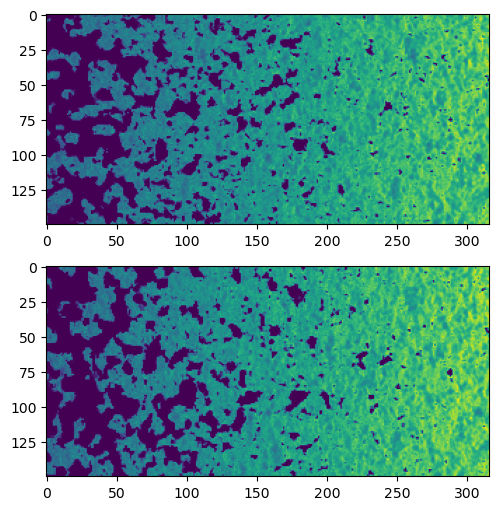

In [104]:
lightcone_simulation = getattr(lightcone, 'brightness_temp')

plt.figure(figsize=(6,6))
plt.subplot(211)
plt.imshow(lightcone_simulation[0,:,:])
plt.subplot(212)
plt.imshow(lightcone_observer[0,:,:])
plt.show()

In [105]:
z_axis = getattr(lightcone, 'lightcone_redshifts')

In [106]:
nu_axis = 1420/(1+z_axis) #MHz

In [107]:
nu_axis

array([157.7777772 , 157.57808106, 157.37850966, 157.1790675 ,
       156.97975239, 156.7805639 , 156.58150404, 156.38256986,
       156.18376347, 155.98508484, 155.78653207, 155.58810781,
       155.38981063, 155.19164007, 154.99359804, 154.79568268,
       154.59789354, 154.40023328, 154.20269793, 154.00529199,
       153.80801283, 153.61086013, 153.41383563, 153.21693763,
       153.02016665, 152.8235233 , 152.62700678, 152.43061656,
       152.23435495, 152.03822103, 151.84221331, 151.64633242,
       151.45057858, 151.25495221, 151.05945259, 150.86408121,
       150.66883556, 150.47371796, 150.27872762, 150.0838641 ,
       149.88912689, 149.69451743, 149.50003605, 149.30567944,
       149.11145175, 148.91734991, 148.72337622, 148.5295291 ,
       148.33580895, 148.14221629, 147.94875118, 147.75541204,
       147.56219999, 147.36911479, 147.17615838, 146.98332691,
       146.79062354, 146.59804756, 146.40559711, 146.21327463,
       146.02107908, 145.82901042, 145.63706849, 145.44

In [108]:
nu_ax_lin = np.linspace(nu_axis[0], nu_axis[-1], len(nu_axis))

In [109]:
nu_ax_lin

array([157.7777772 , 157.59799209, 157.41820699, 157.23842189,
       157.05863679, 156.87885169, 156.69906659, 156.51928149,
       156.33949639, 156.15971129, 155.97992619, 155.80014109,
       155.62035599, 155.44057089, 155.26078579, 155.08100069,
       154.90121559, 154.72143049, 154.54164539, 154.36186028,
       154.18207518, 154.00229008, 153.82250498, 153.64271988,
       153.46293478, 153.28314968, 153.10336458, 152.92357948,
       152.74379438, 152.56400928, 152.38422418, 152.20443908,
       152.02465398, 151.84486888, 151.66508378, 151.48529868,
       151.30551357, 151.12572847, 150.94594337, 150.76615827,
       150.58637317, 150.40658807, 150.22680297, 150.04701787,
       149.86723277, 149.68744767, 149.50766257, 149.32787747,
       149.14809237, 148.96830727, 148.78852217, 148.60873707,
       148.42895197, 148.24916687, 148.06938176, 147.88959666,
       147.70981156, 147.53002646, 147.35024136, 147.17045626,
       146.99067116, 146.81088606, 146.63110096, 146.45

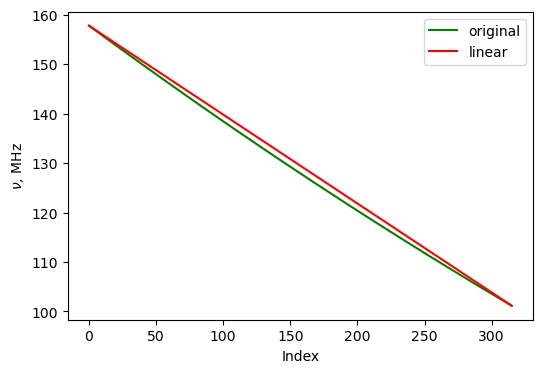

In [110]:
plt.figure(figsize=(6,4))
plt.subplot(111)
plt.plot(nu_axis, 'g', label='original')
plt.plot(nu_ax_lin, 'r', label='linear')
plt.xlabel('Index')
plt.ylabel(r'$\nu$, MHz')
plt.legend()

plt.show()

In [111]:
def find_closest_values(val, arr):
    # Assuming arr is sorted. If not, sort it first.
    arr.sort()

    for i in range(len(arr)):
        if arr[i] >= val:
            # Handle the case where the value is smaller than all elements in arr
            if i == 0:
                return None, arr[0]
            # Return the closest smaller and larger values
            return arr[i - 1], arr[i]

    # Handle the case where the value is larger than all elements in arr
    return arr[-1], None

In [112]:
idx = 158

smaller, larger = find_closest_values(nu_ax_lin[idx], nu_axis)

In [113]:
print(smaller, nu_ax_lin[idx], larger)

129.24297206042584 129.3717313049465 129.42375496868866


In [114]:
print(np.argwhere(nu_axis==smaller), np.argwhere(nu_axis==larger))

[[165]] [[166]]


In [115]:
smaller_norm = 0
larger_norm = larger - smaller
pos_norm = nu_ax_lin[idx] - smaller

In [116]:
idx_low = np.argwhere(nu_axis==smaller)
idx_high = np.argwhere(nu_axis==larger)


array1 = lightcone_observer[:,:,idx_low[0][0]]
array2 = lightcone_observer[:,:,idx_high[0][0]]


# Locations
loc1 = smaller_norm
loc2 = larger_norm
new_loc = pos_norm

x = np.array([loc1, loc2])

z = np.array([array1, array2])

# Interpolating each point
interpolated_array = np.zeros_like(array1)
for i in range(np.shape(array1)[0]):
    for j in range(np.shape(array1)[1]):
        interp_func = interpolate.interp1d(x, z[:, i, j], kind='linear')
        interpolated_array[i, j] = interp_func(new_loc)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


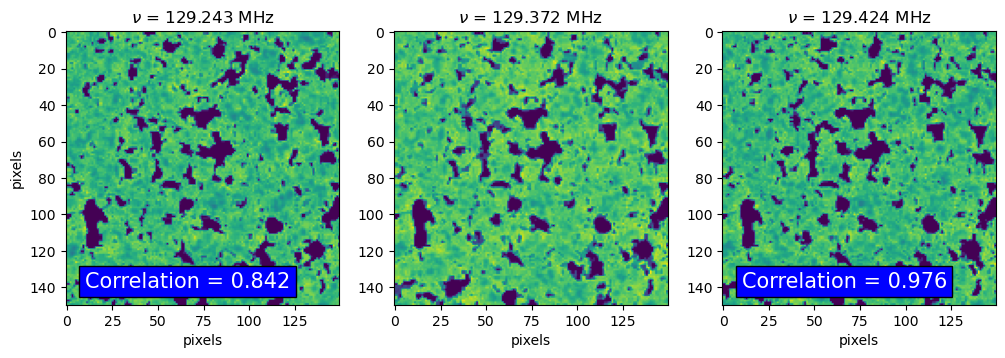

In [118]:
from scipy.stats import pearsonr

corr1, _ = pearsonr(lightcone_observer[:,:,idx_low[0][0]].flatten(), interpolated_array.flatten())

corr2, _ = pearsonr(lightcone_observer[:,:,idx_high[0][0]].flatten(), interpolated_array.flatten())

print(lightcone_observer[:,:,idx_low[0][0]]==interpolated_array)

fig = plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(lightcone_observer[:,:,idx_low[0][0]])
plt.title(r"$\nu$ = {} MHz".format(np.round(smaller, 3)))
plt.text(10, 140, 'Correlation = {}'.format(round(corr1,3)), fontsize=15, color='white', 
         bbox=dict(facecolor='blue', alpha=1.0))
plt.ylabel('pixels')
plt.xlabel('pixels')
plt.subplot(132)
plt.imshow(interpolated_array)
plt.title(r"$\nu$ = {} MHz".format(np.round(nu_ax_lin[idx], 3)))
plt.xlabel('pixels')
plt.subplot(133)
plt.imshow(lightcone_observer[:,:,idx_high[0][0]])
plt.text(10, 140, 'Correlation = {}'.format(round(corr2,3)), fontsize=15, color='white', 
         bbox=dict(facecolor='blue', alpha=1.0))
plt.title(r"$\nu$ = {} MHz".format(np.round(larger, 3)))
plt.xlabel('pixels')
plt.show()

In [50]:
statement = lightcone_observer[:,:,idx_low[0][0]] == nu_ax_lin[idx]
True in statement

False

In [51]:
interpolated_lightcone = np.zeros_like(lightcone_observer)

interpolated_lightcone[:,:,0] = lightcone_observer[:,:,-1]
interpolated_lightcone[:,:,-1] = lightcone_observer[:,:,0]



for i in tqdm(range(np.shape(lightcone_observer)[-1]-2)):

    idx = i+1
    
    smaller, larger = find_closest_values(nu_ax_lin[idx], nu_axis)

    smaller_norm = 0
    larger_norm = larger - smaller
    pos_norm = nu_ax_lin[idx] - smaller

    idx_low = np.argwhere(nu_axis==smaller)
    idx_high = np.argwhere(nu_axis==larger)


    array1 = lightcone_observer[:,:,idx_low[0][0]]
    array2 = lightcone_observer[:,:,idx_high[0][0]]


    # Locations
    loc1 = smaller_norm/larger_norm
    loc2 = larger_norm/larger_norm
    new_loc = pos_norm/larger_norm
  

    x = np.array([loc1, loc2])

    z = np.array([array1, array2])

    # Interpolating each point
    interpolated_array = np.zeros_like(array1)
    for i in range(np.shape(array1)[0]):
        for j in range(np.shape(array1)[1]):
            interp_func = interpolate.interp1d(x, z[:, i, j], kind='nearest')
            interpolated_array[i, j] = interp_func(new_loc)

    interpolated_lightcone[:,:,idx] = interpolated_array

    
interpolated_lightcone = np.flip(interpolated_lightcone, axis=2)

        

  0%|          | 0/314 [00:00<?, ?it/s]

100%|██████████| 314/314 [36:54<00:00,  7.05s/it]    


In [52]:
np.save('interpolated_lightcone', interpolated_lightcone)

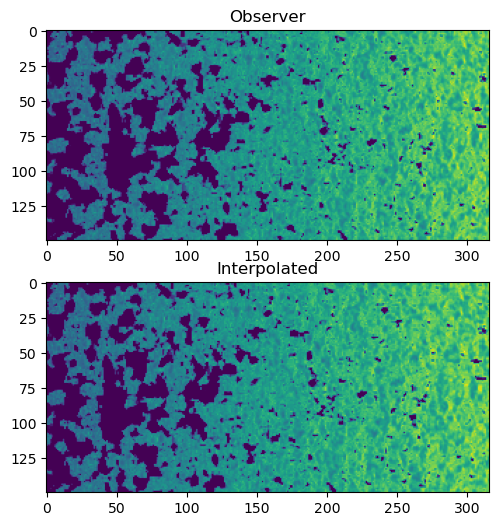

In [53]:
plt.figure(figsize=(6,6))
plt.subplot(211)
plt.imshow(lightcone_observer[0,:,:])
plt.title("Observer")
plt.subplot(212)
plt.imshow(interpolated_lightcone[0,:,:])
plt.title("Interpolated")
plt.show()

In [54]:
np.shape(interpolated_lightcone)

(150, 150, 316)

In [55]:
print(np.max(nu_ax_lin))
print(nu_ax_lin[1]-nu_ax_lin[0])
print(np.min(nu_ax_lin))

157.77777719532435
-0.17978510057201902
101.14547051514067


In [56]:
nu_ax_lin

array([157.7777772 , 157.59799209, 157.41820699, 157.23842189,
       157.05863679, 156.87885169, 156.69906659, 156.51928149,
       156.33949639, 156.15971129, 155.97992619, 155.80014109,
       155.62035599, 155.44057089, 155.26078579, 155.08100069,
       154.90121559, 154.72143049, 154.54164539, 154.36186028,
       154.18207518, 154.00229008, 153.82250498, 153.64271988,
       153.46293478, 153.28314968, 153.10336458, 152.92357948,
       152.74379438, 152.56400928, 152.38422418, 152.20443908,
       152.02465398, 151.84486888, 151.66508378, 151.48529868,
       151.30551357, 151.12572847, 150.94594337, 150.76615827,
       150.58637317, 150.40658807, 150.22680297, 150.04701787,
       149.86723277, 149.68744767, 149.50766257, 149.32787747,
       149.14809237, 148.96830727, 148.78852217, 148.60873707,
       148.42895197, 148.24916687, 148.06938176, 147.88959666,
       147.70981156, 147.53002646, 147.35024136, 147.17045626,
       146.99067116, 146.81088606, 146.63110096, 146.45

In [57]:
distances = getattr(lightcone, 'lightcone_distances')
dist_max = np.max(distances)
theta = np.arctan((box_len/2)/dist_max)
angle = 2 * (theta*180/np.pi) # check if looks sensible
angle

2.8120714568290333

In [59]:
distances = getattr(lightcone, 'lightcone_distances')
dist_min = np.min(distances)
theta = np.arctan((box_len/2)/dist_min)
angle = 2 * (theta*180/np.pi) # check if looks sensible
angle

3.1362739101377324